In [122]:


from EmQuantAPI import *
import time
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split as TTS
loginresult = c.start( )
#loginresult为c.EmQuantData类型数据
print (loginresult)
# 2022-06-22 08:35:12
# 沪深股票 均价 成交量 成交金额 收盘价
data=c.csd("000972.SZ","AVERAGE,VOLUME,AMOUNT,HIGHLIMIT","2021-05-22","2022-06-21","period=1,adjustflag=1,curtype=1,order=1,market=CNSESZ,order=1,Ispandas=1,RowIndex=0")
print(data)

# data['DATES'][0]=time.mktime(data['DATES'])

[EmQuantAPI Python] [Em_Info][2022-06-22 10:07:40]:your account is online, not need login in again!

ErrorCode=0, ErrorMsg=success, Data={}
         CODES       DATES AVERAGE    VOLUME       AMOUNT HIGHLIMIT
0    000972.SZ  2021/05/24    1.96   2104765    4125339.4         是
1    000972.SZ  2021/05/25  2.0449  12670180  25908938.01         是
2    000972.SZ  2021/05/26  2.0475   9612577  19681498.85         否
3    000972.SZ  2021/05/27  2.0721   4559512   9447834.24         是
4    000972.SZ  2021/05/28  2.1966   3855713   8469400.73         是
..         ...         ...     ...       ...          ...       ...
257  000972.SZ  2022/06/15  2.6581  11825430   31433617.2         否
258  000972.SZ  2022/06/16  2.6797  12971207  34758900.26         否
259  000972.SZ  2022/06/17  2.6483   7020200   18591724.0         否
260  000972.SZ  2022/06/20  2.6935   5553300   14957960.0         否
261  000972.SZ  2022/06/21  2.6764   2751101   7362956.66         否

[262 rows x 6 columns]


In [123]:
for i in range(0,len(data['DATES'])):
    timeArray = time.strptime(data['DATES'][i], "%Y/%m/%d")
    timeStamp = int(time.mktime(timeArray))
    data['DATES'][i]=timeStamp

# 是：0，否：1
data["HIGHLIMIT"] = (data["HIGHLIMIT"]== "否").astype("int")
data_features=data.iloc[:, 1:5].to_numpy()
data_target=data.iloc[:,5].to_numpy()
# print(data_features)
# print(data_target)
data_feature_name =[       "DATES" ,"AVERAGE",    "VOLUME"  ,     "AMOUNT"]

Xtrain, Xtest, Ytrain, Ytest = TTS(data_features, data_target, test_size=0.4, random_state=420)
print(Xtrain)
print(Ytrain)


[[1645372800 2.624 10253899 26906090.43]
 [1647792000 2.6394 3917400 10339519.0]
 [1632672000 2.1476 6230000 13379652.0]
 [1635091200 2.1658 3114426 6745115.34]
 [1644163200 2.6682 5267464 14054616.39]
 [1632931200 2.2005 4121403 9069246.54]
 [1649952000 2.1193 6700102 14199348.26]
 [1653321600 2.1737 9875609 21467078.93]
 [1632240000 2.2587 3479400 7858752.0]
 [1626710400 1.9783 3275604 6480049.68]
 [1646323200 2.7387 4904713 13432717.0]
 [1629907200 2.0074 2883261 5787912.0]
 [1623168000 2.3051 5459361 12584511.79]
 [1628611200 1.9141 2749982 5263717.8]
 [1626796800 1.9806 3624101 7177833.98]
 [1631635200 2.2282 3699270 8242755.1]
 [1634486400 2.1537 2801903 6034403.42]
 [1625673600 2.0612 13182545 27171804.5]
 [1644940800 2.8228 9185001 25927533.78]
 [1636300800 2.72 2118101 5761234.72]
 [1648396800 2.4005 7227600 17349994.0]
 [1623859200 2.298 3853464 8855319.99]
 [1637683200 2.9352 21349241 62664481.31]
 [1626364800 1.9997 3493700 6986449.0]
 [1635264000 2.1746 4073821 8858844.63]

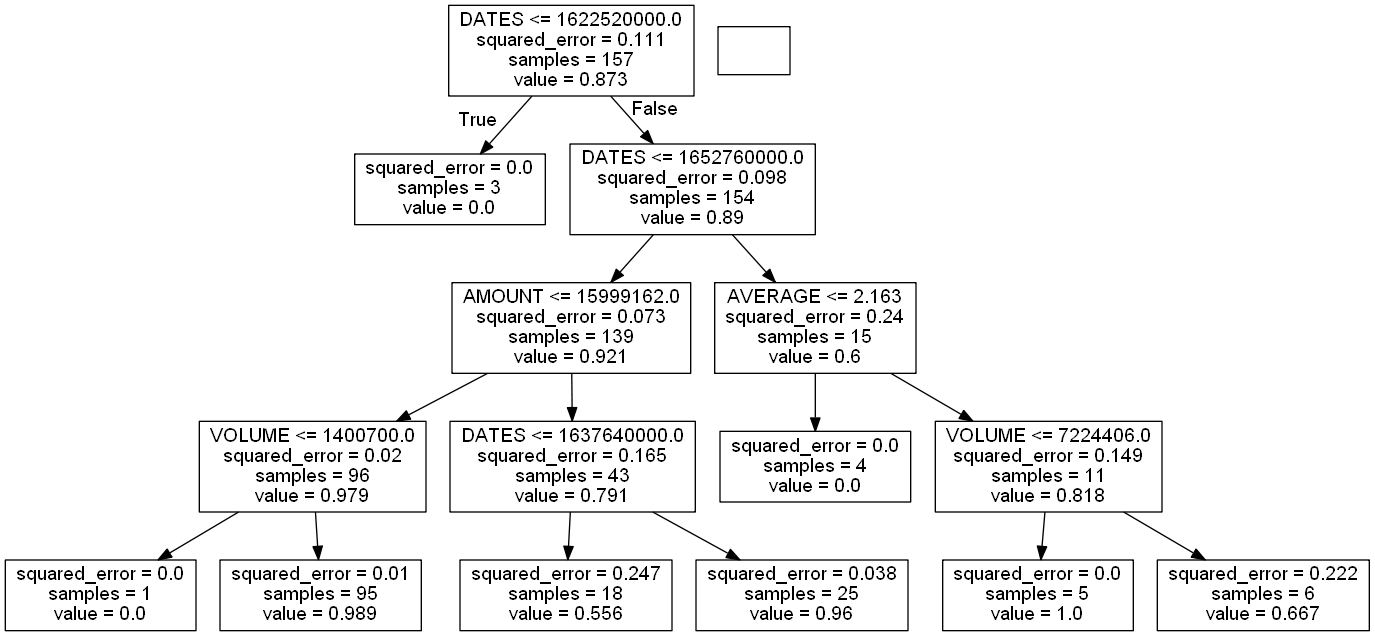

In [124]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split as TTS
import numpy as np
import pandas as pd
from sklearn import tree
rgs = tree.DecisionTreeRegressor(max_depth=4)
rgs = rgs.fit(Xtrain, Ytrain)
import pydotplus
from IPython.display import Image, display
dot_data = tree.export_graphviz(rgs,
                                # out_file = None,
                                feature_names = data_feature_name,
                                class_names = data_target,
                                # filled = True,
                                # rounded = True
                               )
graph = pydotplus.graph_from_dot_data(dot_data)
display(Image(graph.create_png()))

In [125]:
print("==========================================")
print("准确率为：", abs(rgs.score(Xtest, Ytest)))
print("==========================================")

准确率为： 0.19968368709840423


In [126]:
print("==========================================")
print("测试数据[[1651075200 ,1.7149 ,5298700 ,9086902.0]]")
test=np.array([[1651075200 ,1.7149 ,5298700 ,9086902.0]])
predict_result=rgs.predict(test)
print(predict_result)
#  是：0，否：1

print("==========================================")

测试数据[[1651075200 ,1.7149 ,5298700 ,9086902.0]]
[0.98947368]
